
# Линейная регрессия. Практическая работа

## Цель практической работы

- Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическое задание


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Получить качество модели с помощью MSE, MAE.


## Что оценивается 

1. Выполнены все этапы задания.
2. Сделан вывод по результатам.
3. Модель не переобучена.
4. Получена модель хорошего качества.

**Как отправить задание на проверку**

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



# Задача

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир.

- цена продажи (SalePrice, зависимая переменная),
- наземная жилая зона (GrLivArea),
- общее качество (Overall Quality),
- территория гаража (GarageArea),
- условия сделки (SaleCondition). 

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

In [2]:
# подключить необходимые библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
# Ваш код здесь

In [3]:
# считать данные
df = pd.read_csv('4.7 sales.csv')
df
# Ваш код здесь

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


In [4]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы
# Найдем есть ли дубликаты
df[df.duplicated()]
# Ваш код здесь

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
831,151000,1200,480,7,Pave,Normal


In [5]:
# Удалим дубликаты
df= df.drop_duplicates()
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


In [6]:
# Выведем описательные статистики для всего датасета
df.describe(include='all')

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459
unique,NaN,NaN,NaN,NaN,2,6
top,NaN,NaN,NaN,NaN,Pave,Normal
freq,NaN,NaN,NaN,NaN,1453,1197
mean,180941.703907,1515.679918,472.975326,6.098698,NaN,NaN
std,79465.875738,525.595586,213.878071,1.383270,NaN,NaN
min,34900.000000,334.000000,0.000000,1.000000,NaN,NaN
25%,129950.000000,1129.000000,333.000000,5.000000,NaN,NaN
50%,163000.000000,1464.000000,480.000000,6.000000,NaN,NaN
75%,214000.000000,1777.500000,576.000000,7.000000,NaN,NaN


In [7]:
#Посмотрим какие значения принимают переменные с характеристиками.
col = df.columns

for i in col:
    print(f'Характеристика: {i}')
    print(f'Количество уникальных значений:{len(df[i].unique())}')
    print(f'Список значений:\n {df[i].value_counts()}\n')

Характеристика: SalePrice
Количество уникальных значений:663
Список значений:
 140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

Характеристика: GrLivArea
Количество уникальных значений:861
Список значений:
 864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

Характеристика: GarageArea
Количество уникальных значений:441
Список значений:
 0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64

Характеристика: OverallQual
Количество уникальных значений:10
Список значений:
 5     397
6     374
7     318
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Характеристика: Street
Количество уникальн

In [8]:
# Выведем количество полностью заполненных объектов и их процент из всей выборки.
full_values = len(df.dropna())
percent_full = round(full_values * 100 / len(df), 2)
print(f'Процент полностью заполненных объектов значений: {full_values}, их процент составляет: {percent_full}%')

Процент полностью заполненных объектов значений: 1459, их процент составляет: 100.0%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


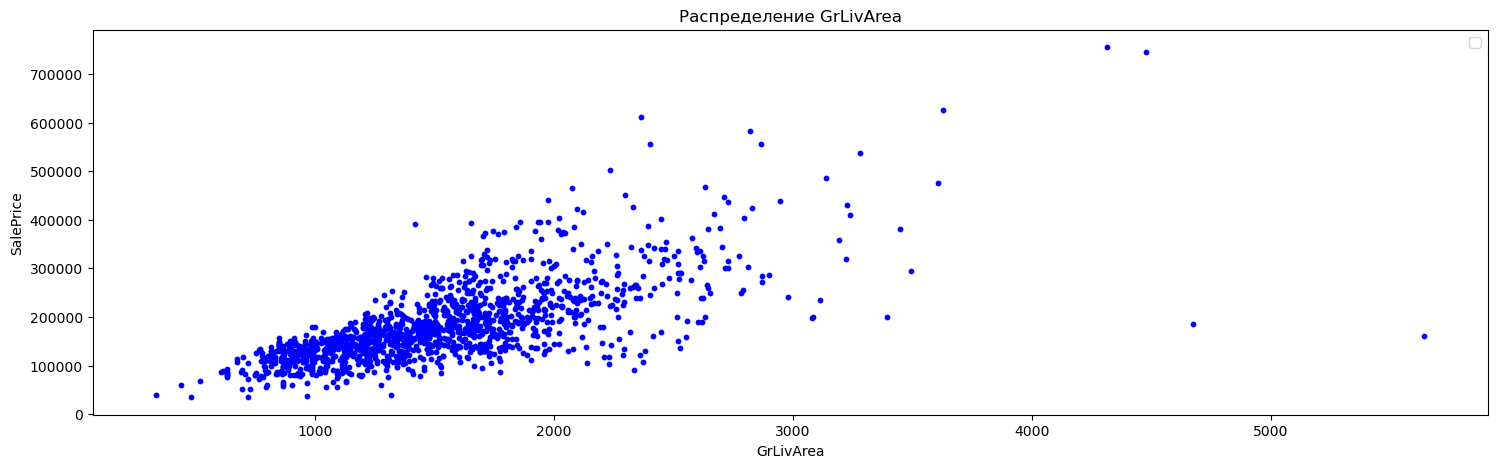

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


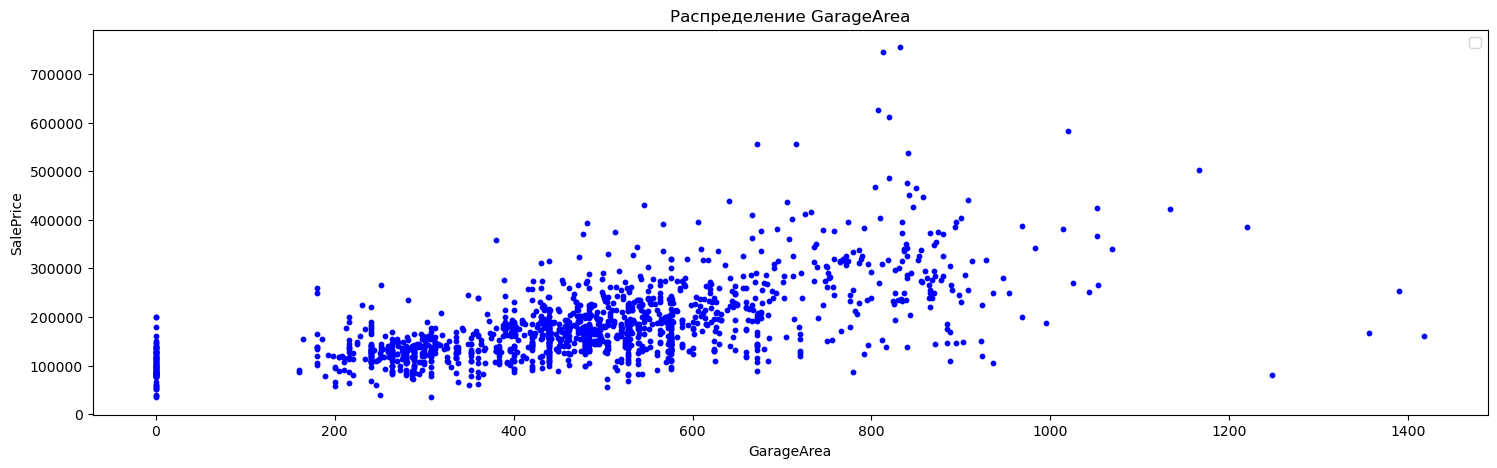

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


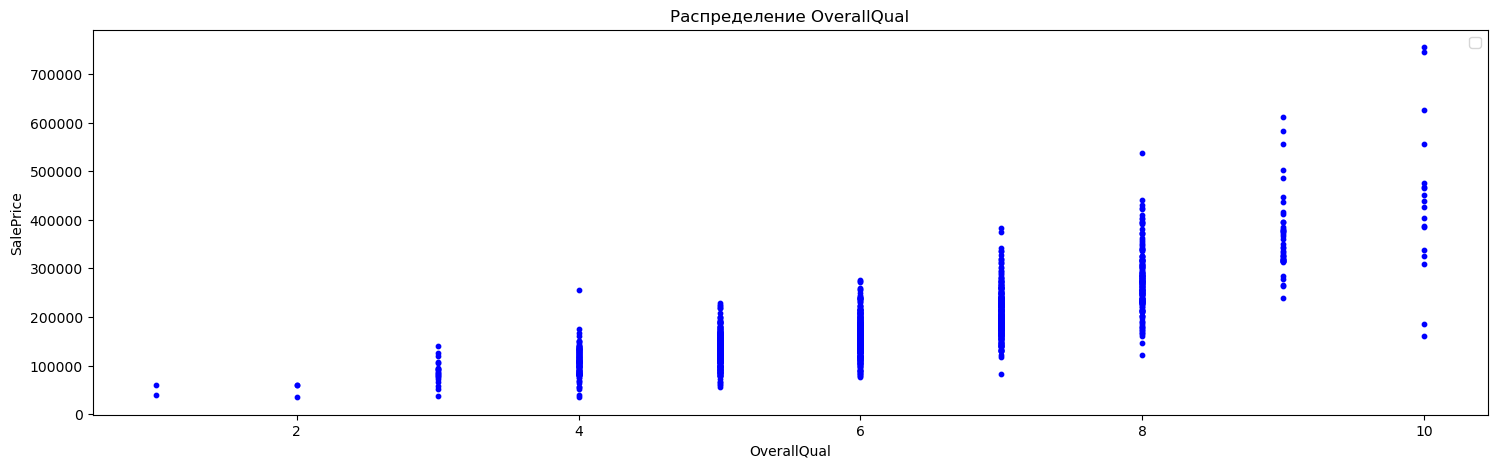

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


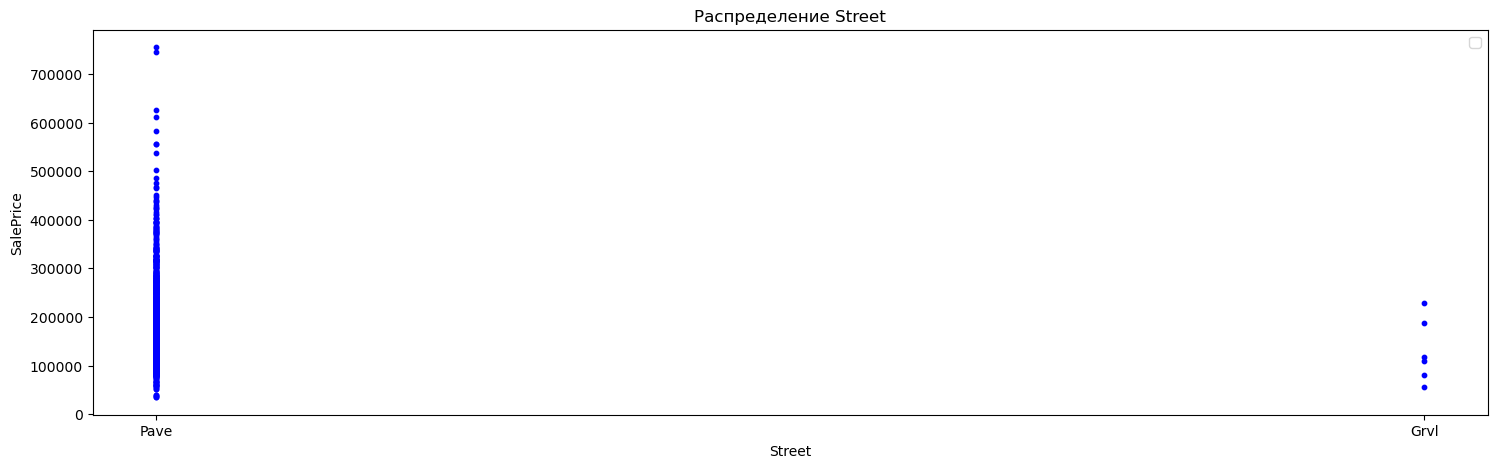

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


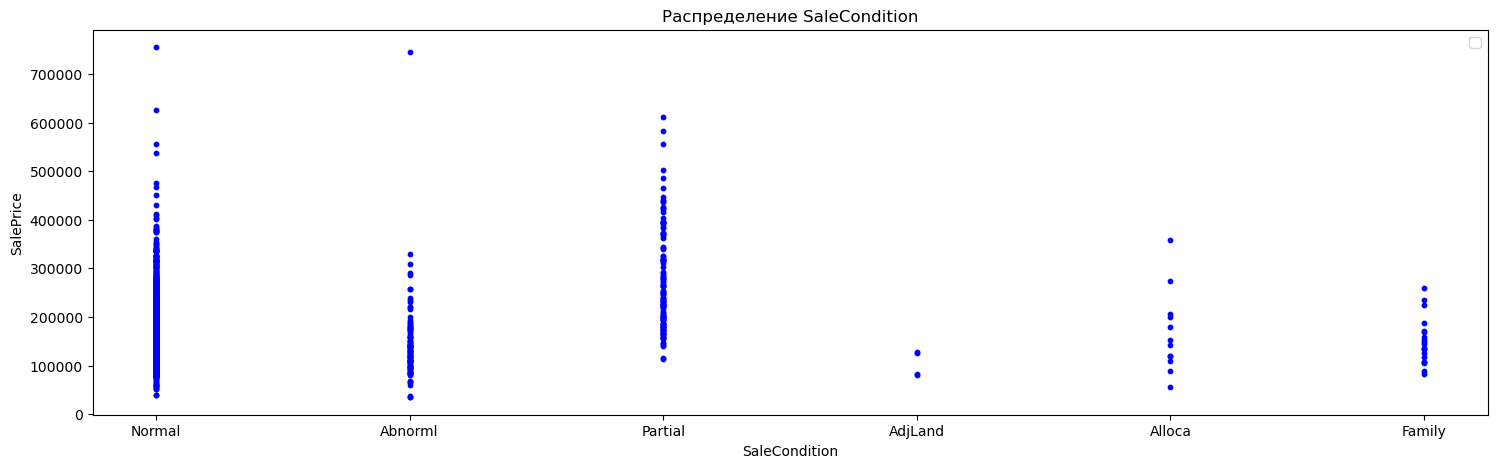

In [9]:
# Построим распределения признаков
plt.rc('figure', figsize=(18, 5))
for i in df.drop(columns=['SalePrice']).columns:
    plt.scatter(df[i], df['SalePrice'], s=10, c='b')
    plt.title('Распределение ' + i);
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.legend();
    plt.show()

Признаки 'OverallQual', 'Street', 'SaleCondition' являются категориальными рассмотрим их отдельно.


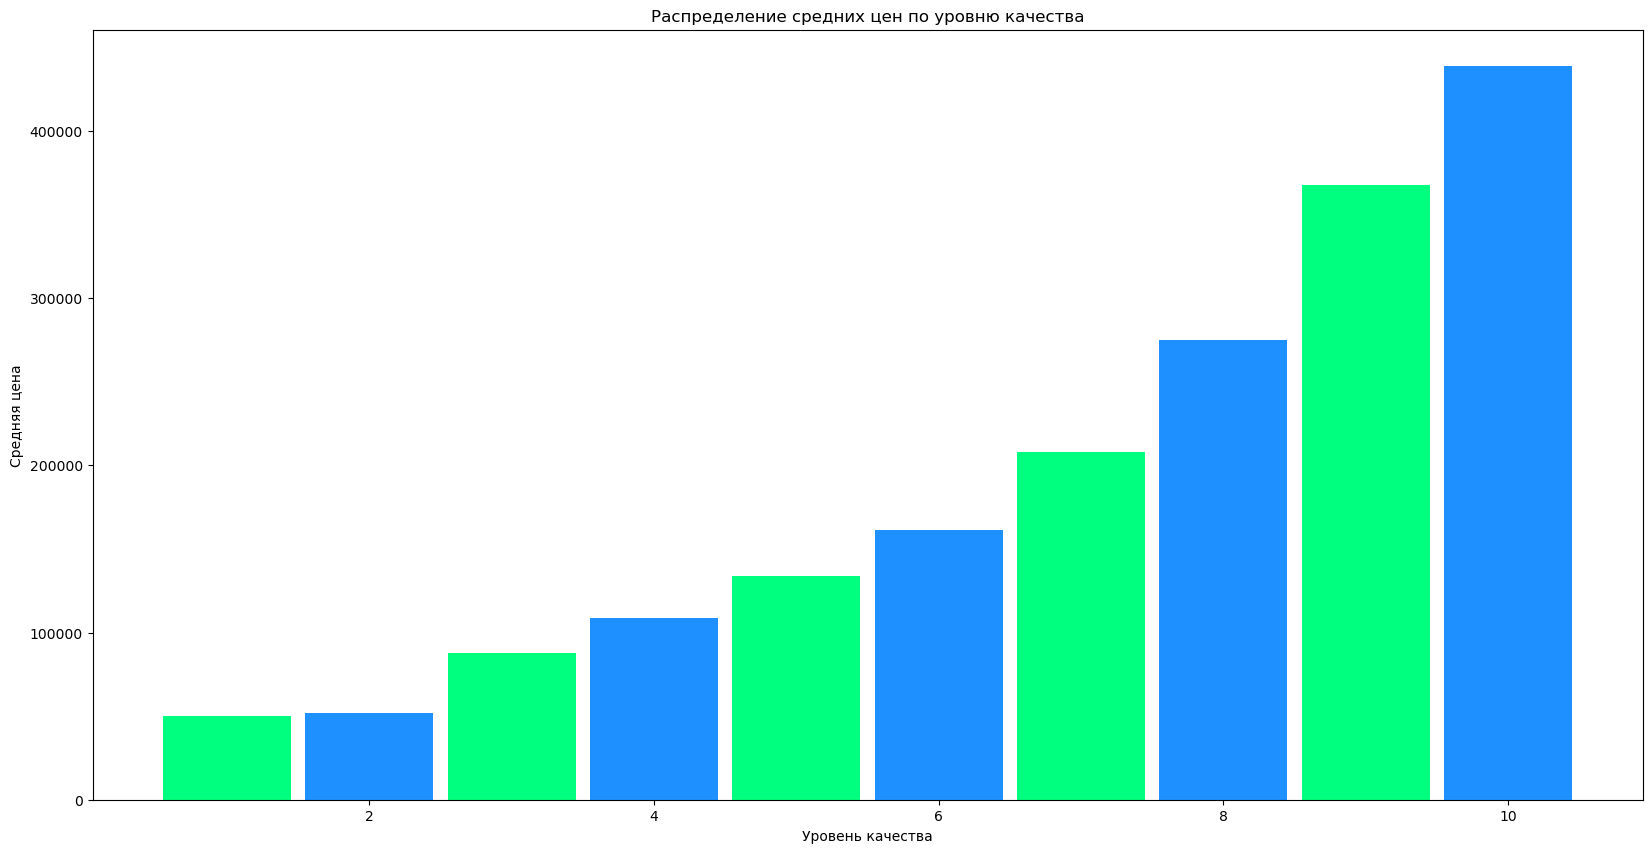

In [10]:
# Построим диаграмму средних цены по признаку 'OverallQual'
df_OverallQual = df.groupby(['OverallQual'], as_index=False)[['SalePrice']].mean()
df_OverallQual = df_OverallQual.rename(columns={'SalePrice': 'average price'})
plt.figure(figsize=(20, 10))
plt.bar(df_OverallQual['OverallQual'], df_OverallQual['average price'], color=['springgreen', 'dodgerblue'], width = 0.9)
plt.xlabel('Уровень качества')
plt.ylabel('Средняя цена')
plt.title('Распределение средних цен по уровню качества');

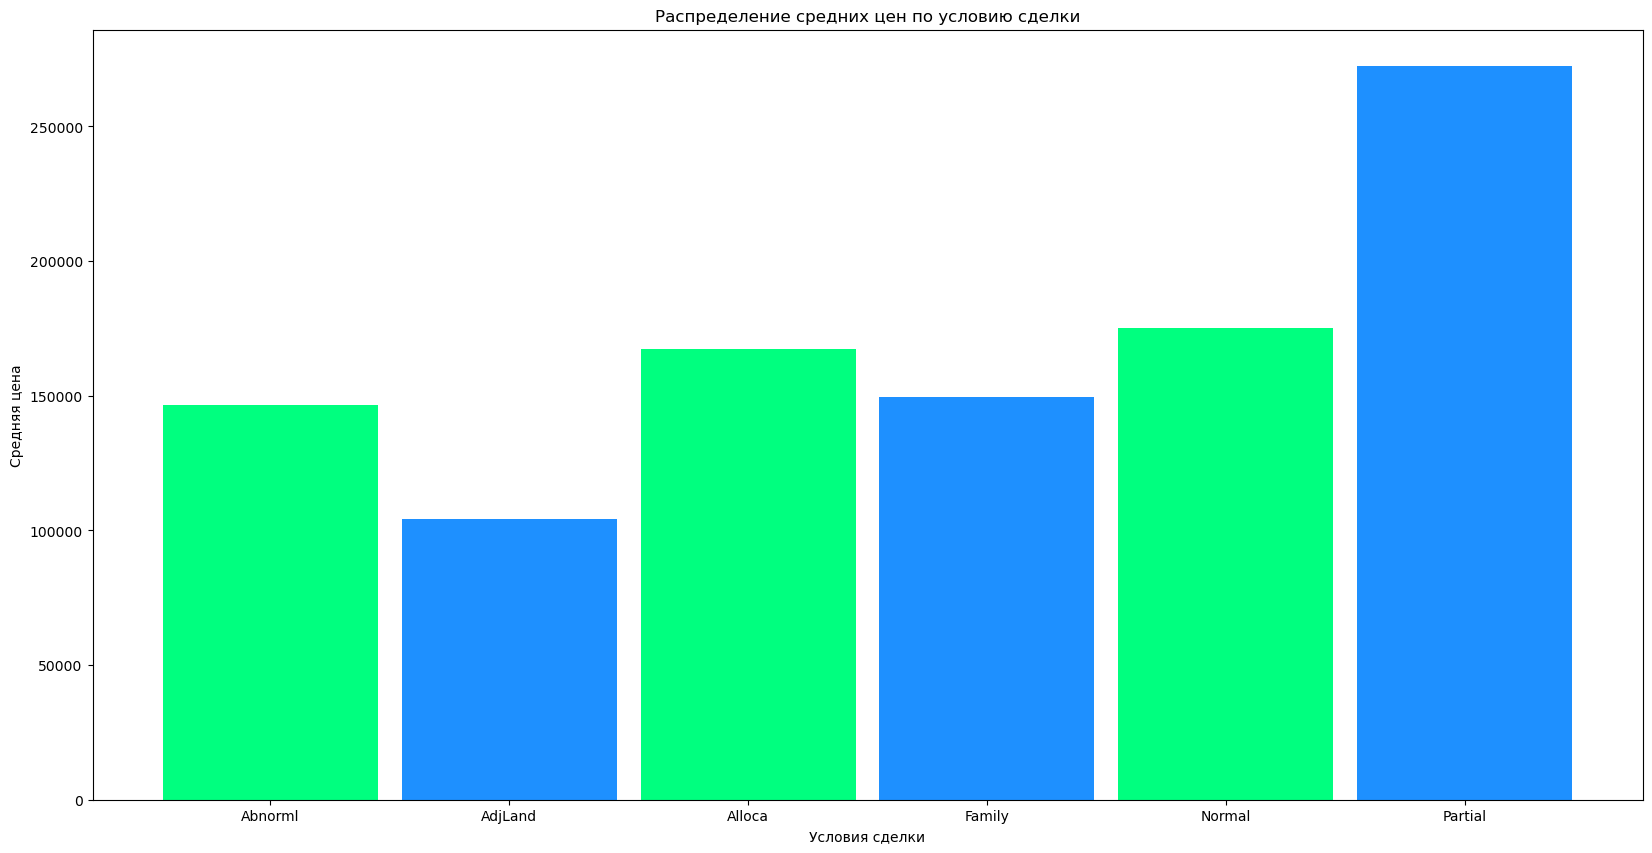

In [11]:
# Построим диаграмму средних цены по признаку 'SaleCondition'
df_SaleCondition = df.groupby(['SaleCondition'], as_index=False)[['SalePrice']].mean()
df_SaleCondition = df_SaleCondition.rename(columns={'SalePrice': 'average price'})
plt.figure(figsize=(20, 10))
plt.bar(df_SaleCondition['SaleCondition'], df_SaleCondition['average price'], color=['springgreen', 'dodgerblue'], width = 0.9)
plt.xlabel('Условия сделки')
plt.ylabel('Средняя цена')
plt.title('Распределение средних цен по условию сделки');

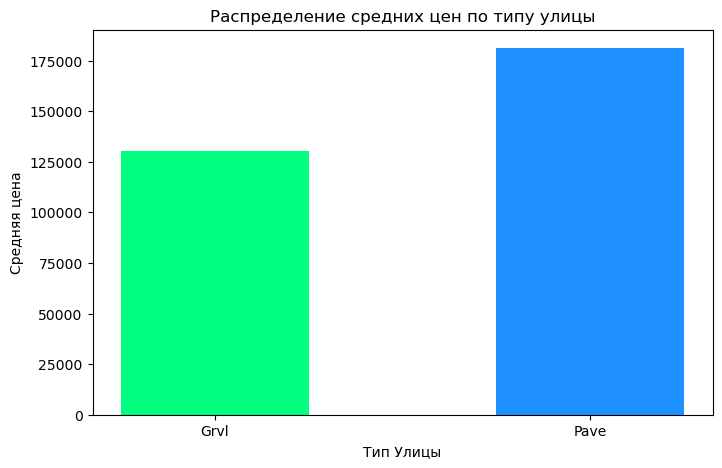

In [12]:
# Построим диаграмму средних цены по признаку 'Street'
df_Street = df.groupby(['Street'], as_index=False)[['SalePrice']].mean()
df_Street = df_Street.rename(columns={'SalePrice': 'average price'})
plt.figure(figsize=(8, 5))
plt.bar(df_Street['Street'], df_Street['average price'], color=['springgreen', 'dodgerblue'], width = 0.5)
plt.xlabel('Тип Улицы')
plt.ylabel('Средняя цена')
plt.title('Распределение средних цен по типу улицы');

In [13]:
# Получим новые фичи для категориальных переменных
df1 = df.copy()

df1['OverallQual'] = df1.OverallQual.astype('category')
category = ['OverallQual', 'Street', 'SaleCondition']
data = df1[category]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
ohe_category = ohe.transform(data)
df1[ohe.get_feature_names()] = ohe_category
df1 = df1.drop(columns=category)
df1

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,SalePrice,GrLivArea,GarageArea,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x0_9,x0_10,x1_Grvl,x1_Pave,x2_Abnorml,x2_AdjLand,x2_Alloca,x2_Family,x2_Normal,x2_Partial
0,208500,1710,548,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,181500,1262,460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,223500,1786,608,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,140000,1717,642,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,250000,2198,836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,210000,2073,500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,266500,2340,252,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,142125,1078,240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# разделить исходные данные на обучающую и тестовую выборки
train, test = train_test_split(df1, train_size=0.7, random_state=123)

# Ваш код здесь


In [15]:
# обучить модель линейной регрессии
model = LinearRegression()
model.fit(train.drop(columns=['SalePrice']), train.SalePrice)
print('w_0:', model.intercept_)
print('w_1:', model.coef_)
# Ваш код здесь

w_0: 70501.70278347791
w_1: [ 5.48747340e+01  5.46549535e+01 -6.75700771e+04 -6.94043000e+04
 -7.08167033e+04 -5.00656101e+04 -3.89202984e+04 -2.58782978e+04
 -2.15768774e+03  4.61796657e+04  1.17776854e+05  1.60856454e+05
 -5.83877285e+03  5.83877285e+03 -4.87544648e+03 -5.21591186e+03
 -6.46827474e+03 -2.04696984e+04  7.41214112e+03  2.96171903e+04]


In [16]:
# сделать предсказание для обучающей и тестовой выборок
y_predict_train = model.predict(train.drop(columns=['SalePrice']))
y_predict_test = model.predict(test.drop(columns=['SalePrice']))
# Ваш код здесь

In [19]:
# проверить качество модели на обучающей и тестовой выборках с помощью MAE, MSE
train_mse = mean_squared_error(train.SalePrice, y_predict_train)
test_mse = mean_squared_error(test.SalePrice, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))
train_mae = mean_absolute_error(train.SalePrice, y_predict_train)
test_mae = mean_absolute_error(test.SalePrice, y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))
train_r2 = r2_score(train.SalePrice, y_predict_train)
print("Train R2: {}".format(train_r2))
test_r2 = r2_score(test.SalePrice, y_predict_test)
print("Test R2: {}".format(test_r2))
# Ваш код здесь

Train MSE: 1311025088.048785
Test MSE: 1538730583.8720782
Train MAE: 23839.545573468313
Test MAE: 24796.973791197557
Train R2: 0.801969577859
Test R2: 0.7246490719473488


Средняя абсолютная ошибка составляет около 13% от среднего значения цены, что можно считать хорошим результатом. Для улучшения результаты необходимо больше признаков. Также можно было лучший результат если бы корреляция между признакоами была меньше. При этом результаты на тренировочной и тестовой выборке различаются не сильно, следовательно модель не переобучена.